# Exploring errors 

In [38]:
# Libraries and setup
library(data.table)
library(ggplot2)

# Setup plot size
options(repr.plot.width=8, repr.plot.height=4)
set.seed(123)

# Random vs sistematic error (variable)

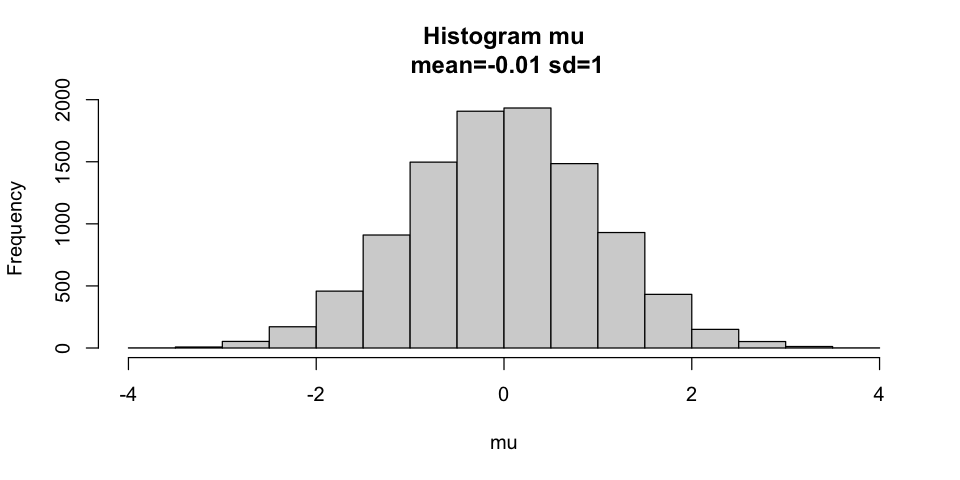

In [59]:
# Simulate variable of interest

nsize = 10000
mu = rnorm(nsize, mean=0, sd=1)
hist(mu, main=paste0('Histogram mu\n mean=', round(mean(mu), 2), ' sd=', round(sd(mu),2)))

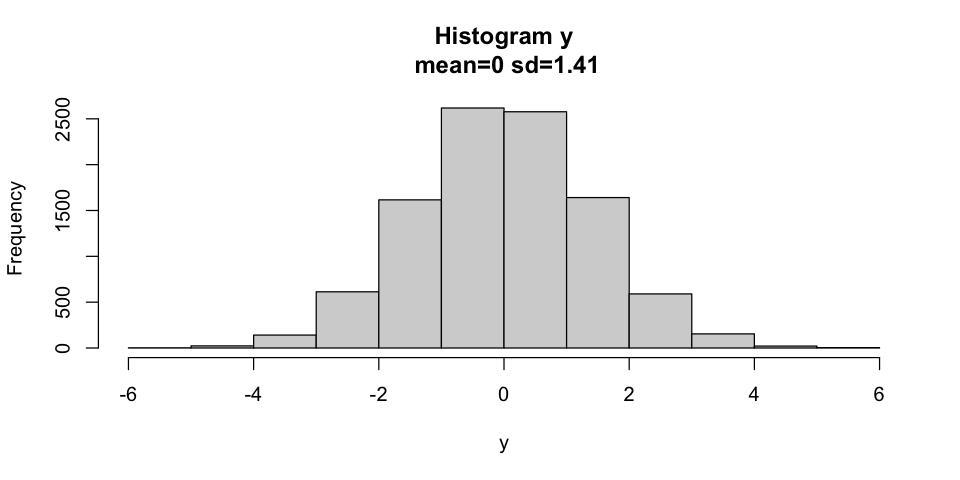

In [60]:
# Create error variable
error = rnorm(nsize, mean=0, sd=1)

# New observed variable
y = mu + error
hist(y, main=paste0('Histogram y\n mean=', round(mean(y), 2), ' sd=', round(sd(y),2)))

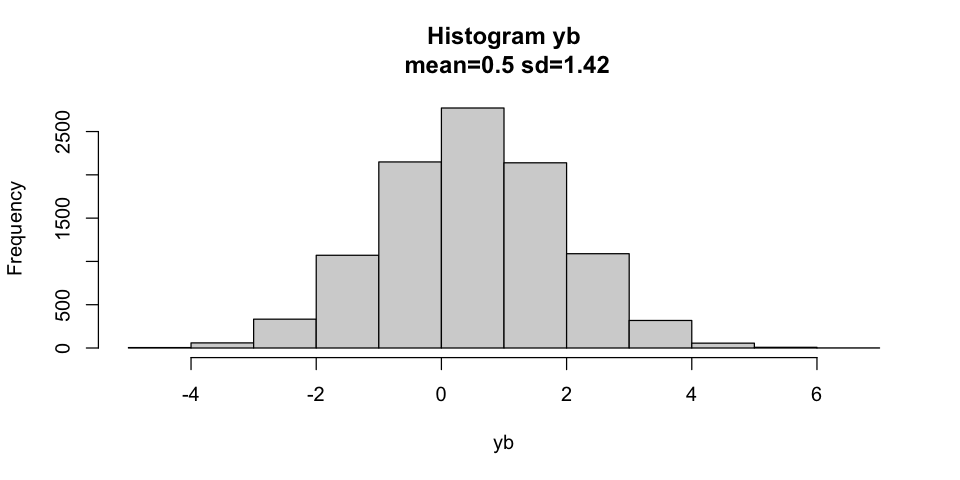

In [61]:
# Let's add some systematic bias
berror = rnorm(nsize, mean=0.5, sd=1)
yb = mu + berror
hist(yb, main=paste0('Histogram yb\n mean=', round(mean(yb), 2), ' sd=', round(sd(yb),2)))

# Sampling error

## Unbiased

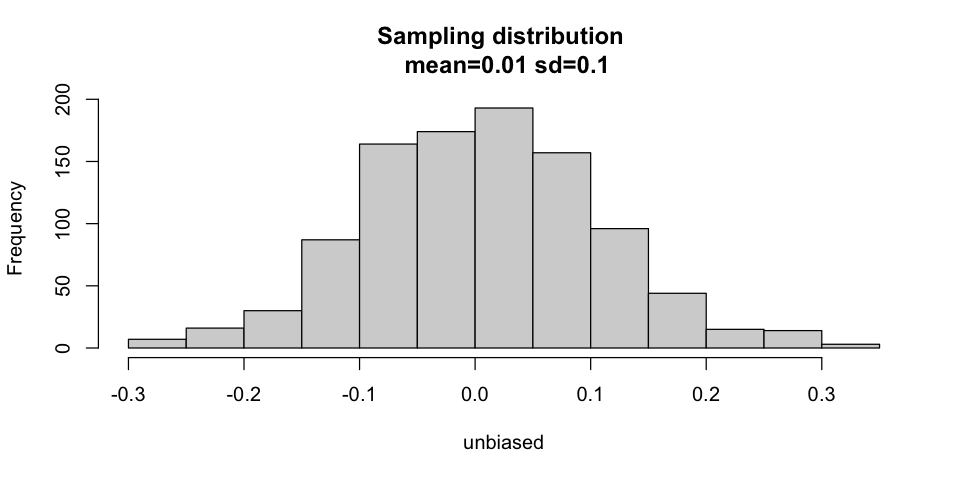

In [63]:
# Get multiple samples from a population
population = rnorm(10000)

# Create 1000 samples of size 100
unbiased = NULL
for (i in 1:1000) {
    unbiased = c(unbiased, mean(sample(population, 100)))
}

hist(unbiased, main=paste0('Sampling distribution \n mean=', round(mean(unbiased),2), 
	' sd=', round(sd(unbiased),2)))

# Biased 

In [64]:
biased = NULL
for (i in 1:1000) {
    biased = c(biased,        
        mean(
            c(sample(population[population>0.3], 60), sample(population[population<=0.3], 40))
            )
        )
}

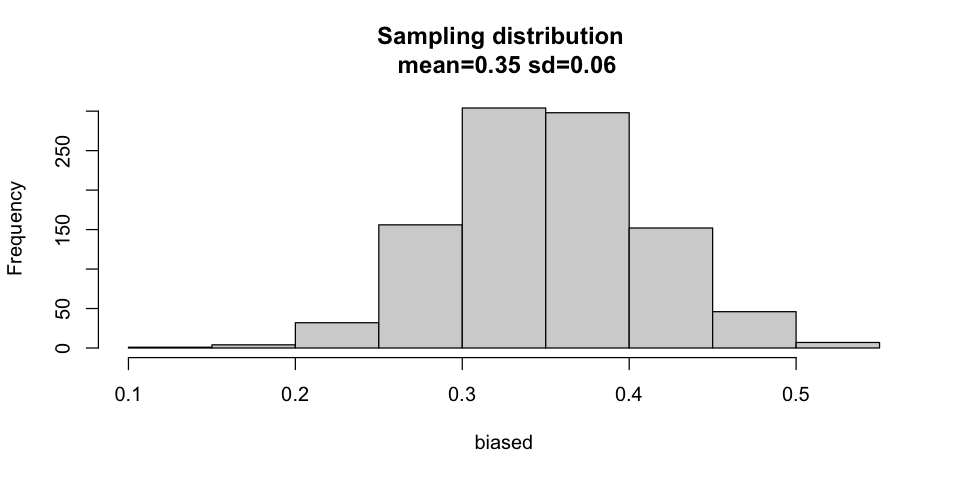

In [65]:
hist(biased, main=paste0('Sampling distribution \n mean=', round(mean(biased),2), 
	' sd=', round(sd(biased),2)))

# Validation versus Bias

In [46]:
# Let's define a construct or gold standard
mu = rnorm(10000)

# Now, let's create an observed variable related to the construct
y = mu*0.3 + rnorm(10000)

# The correlation would be
print(paste0('Correlation between observed and gold standard: ', round(cor(y, mu), 3)))

[1] "Correlation between observed and gold standard: 0.29"


In [47]:
# Now, let's add a bias of 0.4 to the observed variable

yb = y + 0.4
print(paste0('mean mu or gold standard: ', round(mean(mu), 3)))
print(paste0('mean unbiased y: ', round(mean(y), 3)))
print(paste0('mean biased y: ', round(mean(yb), 3)))

# what about the correlation?
print(paste0('correlation biased y and gold standard: ', round(cor(yb, mu), 3)))

# there is no effect on the correlation ~ validity, but yb is clearly biased

[1] "mean mu or gold standard: 0.001"
[1] "mean unbiased y: -0.013"
[1] "mean biased y: 0.387"
[1] "correlation biased y and gold standard: 0.29"


# Reliabity and cronbach's alpha

In [48]:
# let's create a simple function

alpha = function(k, r) {
    # k: number of items
    # r: average correlation between each pair of  between items
    return(k*r/(1 + (k-1)*r))
}

# only increasing the number of items will increase alpha
print(paste0('alpha with 10 items: ', round(alpha(10, 0.3), 3)))
print(paste0('alpha with 30 items: ', round(alpha(30, 0.3), 3)))
print(paste0('alpha with 50 items: ', round(alpha(50, 0.3), 3)))

[1] "alpha with 10 items: 0.811"
[1] "alpha with 30 items: 0.928"
[1] "alpha with 50 items: 0.955"
